In [2]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [4]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [6]:
df_small = pd.read_csv("/content/drive/MyDrive/dataset/Amazon_Marketing_dataset_NLP/small_corpus.csv")

In [7]:
df_small.shape

(4500, 12)

In [9]:
df_small.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,False,"02 27, 2008",A2QL5J9TTSO5I1,B000JGW9AE,E. Miravete,The USB cable that came with the Media Manager did not fit my Ceramic white PSP. It doesn't say that anywhere on the product packaging.,USB cable doesn't fit newer PSP models.,1204070400,NaN,NaN,NaN


In [10]:
# removing rows containing null is reviewText column
df_small.dropna(subset=['reviewText'], inplace=True)

In [19]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [20]:
df_small['swn_score'] = df_small['reviewText'].apply(lambda text : get_sentiment_score(text))

In [22]:
df_small[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
464,"horrible graphics,lousy controls, you can find a better game online that is free! don't waste your money!",0.00000
1406,"The camera angles make this game very hard to like. The characters are redundant and make playing feel like a job. When you get to the boss, there is some rediculous way to kill them that sometimes takes a half hour to figure out. What a waste.",-1.27551


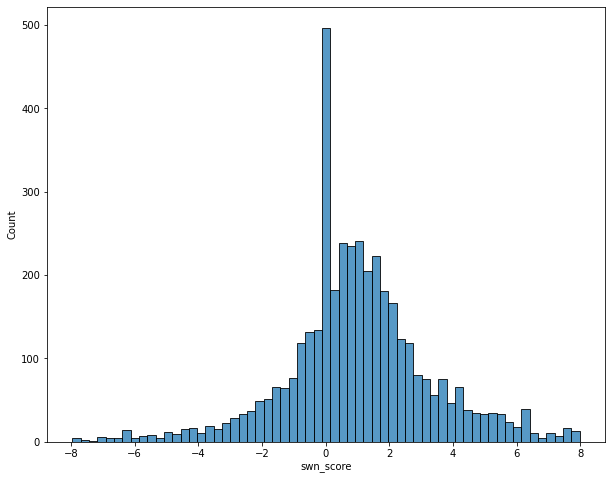

In [23]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.histplot(x='swn_score', data=df_small.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [24]:
df_small['swn_sentiment'] = df_small['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))
df_small.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,swn_score,swn_sentiment
0,1,False,"02 27, 2008",A2QL5J9TTSO5I1,B000JGW9AE,E. Miravete,The USB cable that came with the Media Manager did not fit my Ceramic white PSP. It doesn't say that anywhere on the product packaging.,USB cable doesn't fit newer PSP models.,1204070400,NaN,NaN,NaN,-0.462963,negative


In [25]:
df_small['swn_sentiment'].value_counts(dropna=False)

positive    2250
negative    1781
neutral      468
Name: swn_sentiment, dtype: int64

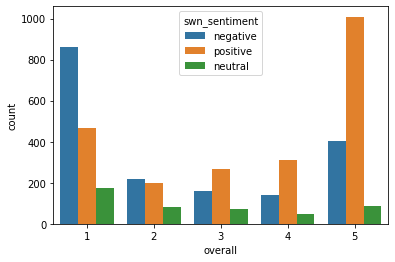

In [26]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = df_small);

In [36]:
!pip3 install spacy==3.2.0
!pip3 install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.0 MB 25.3 MB/s 
     |████████████████████████████████| 457 kB 74.1 MB/s 
     |████████████████████████████████| 10.1 MB 59.2 MB/s 
     |████████████████████████████████| 660 kB 58.4 MB/s 
     |████████████████████████████████| 181 kB 64.8 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled sr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!python3 -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.9 MB 15.5 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [38]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [39]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [40]:
df_small['spacy_score'] = df_small['reviewText'].apply(lambda text : round(nlp(text)._.blob.polarity,2))

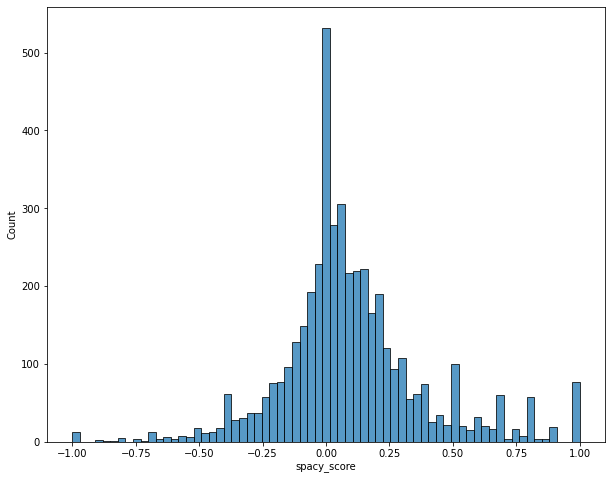

In [42]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.histplot(x='spacy_score', data=df_small, ax=ax)
plt.show()

In [43]:
df_small['spacy_sentiment'] = df_small['spacy_score'].apply(lambda x: "positive" if x>0.2 else ("negative" if x<0.2 else "neutral"))
df_small.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,swn_score,swn_sentiment,spacy_score,spacy_sentiment
0,1,False,"02 27, 2008",A2QL5J9TTSO5I1,B000JGW9AE,E. Miravete,The USB cable that came with the Media Manager did not fit my Ceramic white PSP. It doesn't say that anywhere on the product packaging.,USB cable doesn't fit newer PSP models.,1204070400,NaN,NaN,NaN,-0.462963,negative,-0.1,negative


In [44]:
df_small['spacy_sentiment'].value_counts(dropna=False)

negative    3263
positive    1131
neutral      105
Name: spacy_sentiment, dtype: int64

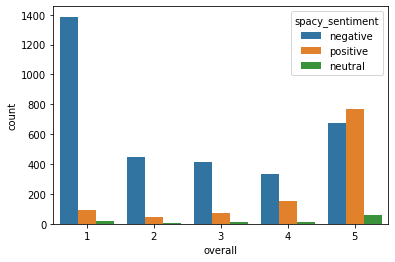

In [45]:
sns.countplot(x='overall', hue='spacy_sentiment' ,data = df_small);

In [47]:
df_small['true_sentiment'] = \
    df_small['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))
df_small.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,swn_score,swn_sentiment,spacy_score,spacy_sentiment,true_sentiment
0,1,False,"02 27, 2008",A2QL5J9TTSO5I1,B000JGW9AE,E. Miravete,The USB cable that came with the Media Manager did not fit my Ceramic white PSP. It doesn't say that anywhere on the product packaging.,USB cable doesn't fit newer PSP models.,1204070400,NaN,NaN,NaN,-0.462963,negative,-0.1,negative,negative


# Performance analysis

In [56]:
y_swn_pred, y_true, y_spacy_pred = df_small['swn_sentiment'].tolist(), df_small['true_sentiment'].tolist(), df_small['spacy_sentiment'].tolist()
print(len(y_swn_pred), len(y_true), len(y_spacy_pred))

4499 4499 4499


In [58]:
from sklearn.metrics import confusion_matrix
cm_sentiword = confusion_matrix(y_true, y_swn_pred)
cm_spacy = confusion_matrix(y_true, y_spacy_pred)

***For Sentiwordnet Scroes***

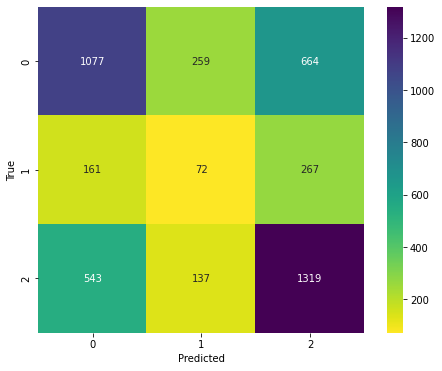

In [59]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm_sentiword, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

***--> For class 0:***

**TP:** Cell-1

**FP:** Cell-2 + Cell-3

**FN:** Cell-4 + Cell-7

**TN:** cell 5 + cell 6 + cell 8 + cell 9

Accuracy tells you how many times the ML model was correct overall. 

Precision is how good the model is at predicting a specific category.

 Recall tells you how many times the model was able to detect a specific category

## Negative Sentiment Prediction Assessment

In [52]:
tp, tn, fp, fn = 1077, 72+267+137+1319, 259+664, 161+543

In [65]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("For Sentiwordnet Scores: \n\nrecall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

For Sentiwordnet Scores: 

recall: 0.6047164514317799
precission: 0.5385
f1 score: 0.5696905580534251


## Positive Sentiment Prediction Assessment

In [69]:
tp, tn, fp, fn = 1319, 1077+259+161+72, 664+267, 543+137

recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("For Sentiwordnet Scores: \n\nrecall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

For Sentiwordnet Scores: 

recall: 0.5495833333333333
precission: 0.5862222222222222
f1 score: 0.5673118279569892


***For Spacy Scores***

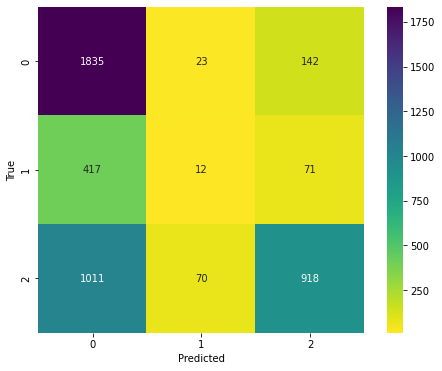

In [62]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm_spacy, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax);
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

## Negative Sentiment Prediction Assessment

In [67]:
# for spacy

tp, tn, fp, fn = 1835, 12+71+70+918, 23+142, 417+1011

recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("For Spacy Scores: \n\nrecall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

For Spacy Scores: 

recall: 0.5623659209316579
precission: 0.9175
f1 score: 0.6973209196275888


## Positive Sentiment Prediction Assessment

In [70]:
tp, tn, fp, fn = 918, 1835+23+417+12, 71+142, 1011+70

recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("For Spacy Scores: \n\nrecall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

For Spacy Scores: 

recall: 0.4592296148074037
precission: 0.8116710875331565
f1 score: 0.5865814696485623
